In [785]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
import cufflinks as cf
%matplotlib inline
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [786]:
# File to import
soccer_data_to_load = "resources/transfermarkt_fbref_201718.csv"

In [787]:
# Read file and store into pandas dataframes
soccer_data = pd.read_csv(soccer_data_to_load, sep=";")


In [788]:
# Display data
soccer_data.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [789]:
# Drop column name  'Unnamed: 0'
clean_data_df = clean_data.drop(columns='Unnamed: 0')
clean_data_df


,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Victor Osimhen,ng NGA,"FW,MF",Wolfsburg,18,1998,1000000,186,attack - Centre-Forward,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2228,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25,1991,3500000,170,attack - Right Winger,left,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2229,Paul Jaeckel,de GER,DF,Wolfsburg,19,1998,5000,189,Defender - Centre-Back,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#
2230,Paul Verhaegh,nl NED,DF,Wolfsburg,33,1983,1000000,178,Defender - Right-Back,right,...,0.97,39.2,49.5,-10.3,-0.30,25712,0,0,0,201718#


In [790]:
# Index 2223 was removed since most of the values for the player were 0.
clean_data = soccer_data.drop(index=2223)

In [791]:
# Create a separate data set for the seaborn pairplot that only includes 'age', 'value', Pts/G','xG','Attendance','position'. The code meant to demonstrate relashionship between different values
set_data = clean_data_df[['age','value','Pts/G','xG','Attendance','position','goals','foot']]
set_data

,age,value,Pts/G,xG,Attendance,position,goals,foot
0,23,1800000,1.24,39.0,"16,819","FW,MF",1,right
1,24,70000000,2.00,83.3,66161,DF,0,right
2,21,2000000,1.24,39.0,"16,819",DF,0,left
3,23,60000000,2.45,78.3,66603,DF,1,left
4,31,1800000,1.24,39.0,"16,819",MF,3,left
...,...,...,...,...,...,...,...,...
2227,18,1000000,0.97,39.2,25712,"FW,MF",0,right
2228,25,3500000,0.97,39.2,25712,"FW,MF",0,left
2229,19,5000,0.97,39.2,25712,DF,0,right
2230,33,1000000,0.97,39.2,25712,DF,2,right


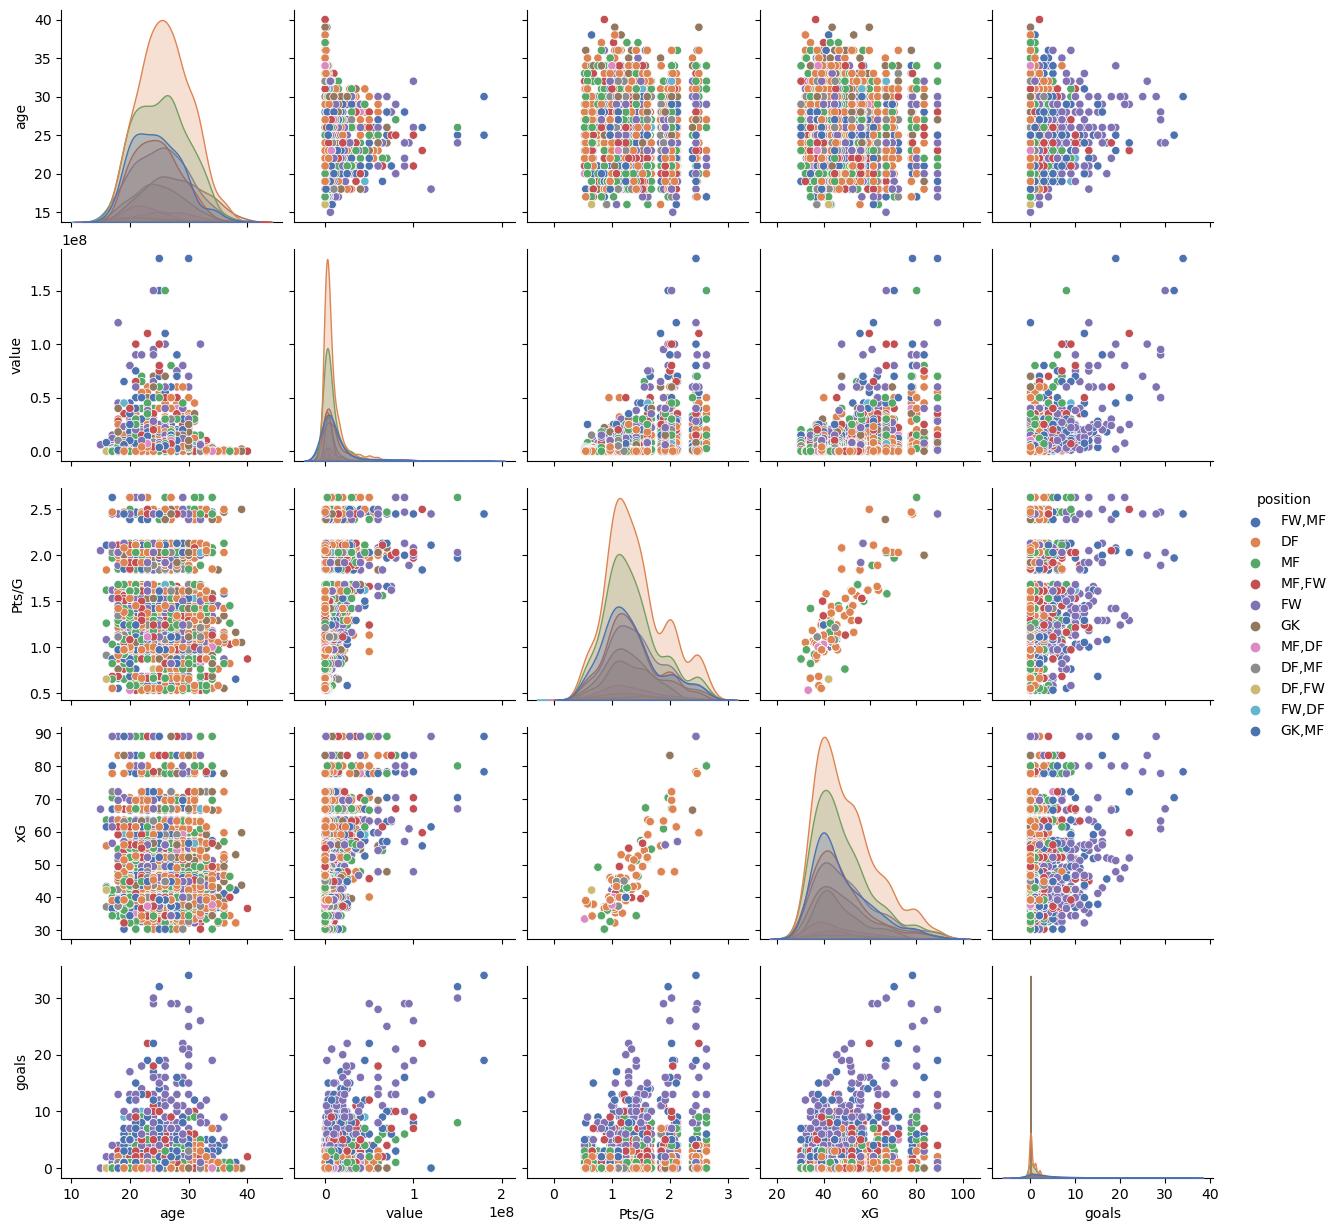

In [792]:
# Create the pairplot using seaborn
sns.pairplot(set_data,palette='deep',hue='position')


In [793]:
# Plot the scatter of the relationshop between points per game vs expected goals
fig = px.scatter(x=clean_data_df['Pts/G'], y= clean_data_df['xG'],width=600,height=500,trendline='ols',title='Pts/G vs xG Scatter')
fig.update_layout(xaxis_title='Pts/G', yaxis_title='xG')

In [794]:
# Perform the T-Test on the Player value & goals
xG = clean_data_df['xG']
Pts_G = clean_data_df['Pts/G']

t, p = ttest_ind(xG, Pts_G)

print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  177.92156247083068
p-value:  0.0


In [795]:
# Choose the column you want to compare the means for and group the data by the categorical column (in this case, nationality)
value_col = clean_data_df['xG']
grouped_data = clean_data_df.groupby('Pts/G')

# Perform the one-way ANOVA test using the `f_oneway` function from the `scipy.stats` library
F, p = stats.f_oneway(*[group[1]['xG'] for group in grouped_data])

# Print the F-statistic and p-value
print('F-statistic:', F)
print('p-value:', p)

F-statistic: 380.67200621082947
p-value: 0.0


In [796]:
# Count the total number of players (The number of player does not match the number of rows because some players changed their club several times)
total_players = len(clean_data_df['player'].unique())
print(f'number of players in the analysis is: {total_players}')

number of players in the analysis is: 2117


In [797]:
# Count number of duplicate players (There are no name duplicates when checked against name and squad)
duplicate_total_players = soccer_data[soccer_data.duplicated(["player",'squad'],keep=False)]
duplicate_total_players.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season


In [798]:
# Determine which nationality has the most players included in the analysis
nationality_count = clean_data_df.groupby(['nationality']).count()['player']
nationality_count = nationality_count.sort_values(ascending=False)
nationality_count




nationality
es ESP     325
fr FRA     281
it ITA     265
de GER     199
eng ENG    176
          ... 
la LAO       1
mr MTN       1
li LIE       1
mg MAD       1
gf GUF       1
Name: player, Length: 98, dtype: int64

In [799]:
# Determine which nationality has the most players included in the analysis
top_10 = nationality_count[:5]
top_10_df = pd.DataFrame(top_10)
top_10_df



,player
nationality,
es ESP,325
fr FRA,281
it ITA,265
de GER,199
eng ENG,176


In [800]:
# Bar chart of top 20 countries with highest number of players
px.bar(top_10_df,width=600,height=400,title='Players by Nationality')

In [801]:
# Identify top players in the Leagues using the following parameters 'value','goals','Pts/G','xGDiff/90','xG','xGA','Attendance','cards_red'
top_players_df = clean_data_df.sort_values(by=['goals','Pts/G','xGDiff/90','xG','xGA','Attendance','value'],ascending=False)
top_players_df[:10]

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
198,Lionel Messi,ar ARG,"FW,MF",Barcelona,30,1987,180000000,170,attack - Right Winger,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
1199,Mohamed Salah,eg EGY,"FW,MF",Liverpool,25,1992,150000000,175,attack - Right Winger,left,...,1.97,70.4,33.3,37.1,0.98,53049,1,0,0,201718#
1982,Harry Kane,eng ENG,FW,Tottenham,24,1993,150000000,188,attack - Centre-Forward,right,...,2.03,67.0,33.2,33.8,0.89,67953,1,0,0,201718#
219,Robert Lewandowski,pl POL,FW,Bayern Munich,28,1988,90000000,185,attack - Centre-Forward,right,...,2.47,77.8,33.7,44.1,1.30,75000,1,0,0,201718#
927,Mauro Icardi,ar ARG,FW,Inter,24,1993,95000000,181,attack - Centre-Forward,right,...,1.89,60.9,35.3,25.6,0.67,57529,1,0,0,201718#
1051,Ciro Immobile,it ITA,FW,Lazio,27,1990,50000000,185,attack - Centre-Forward,right,...,1.89,63.3,44.3,18.9,0.50,30990,0,0,0,201718#
1566,Edinson Cavani,uy URU,FW,Paris S-G,30,1987,60000000,184,attack - Centre-Forward,right,...,2.45,89.1,32.3,56.9,1.50,46929,1,0,0,201718#
1626,Cristiano Ronaldo,pt POR,FW,Real Madrid,32,1985,100000000,187,attack - Left Winger,both,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,1,201718#
205,Luis Suárez,uy URU,FW,Barcelona,30,1987,70000000,182,attack - Centre-Forward,right,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
949,Paulo Dybala,ar ARG,"MF,FW",Juventus,23,1993,110000000,177,attack - Second Striker,left,...,2.50,59.7,28.8,30.9,0.81,39316,1,0,0,201718#


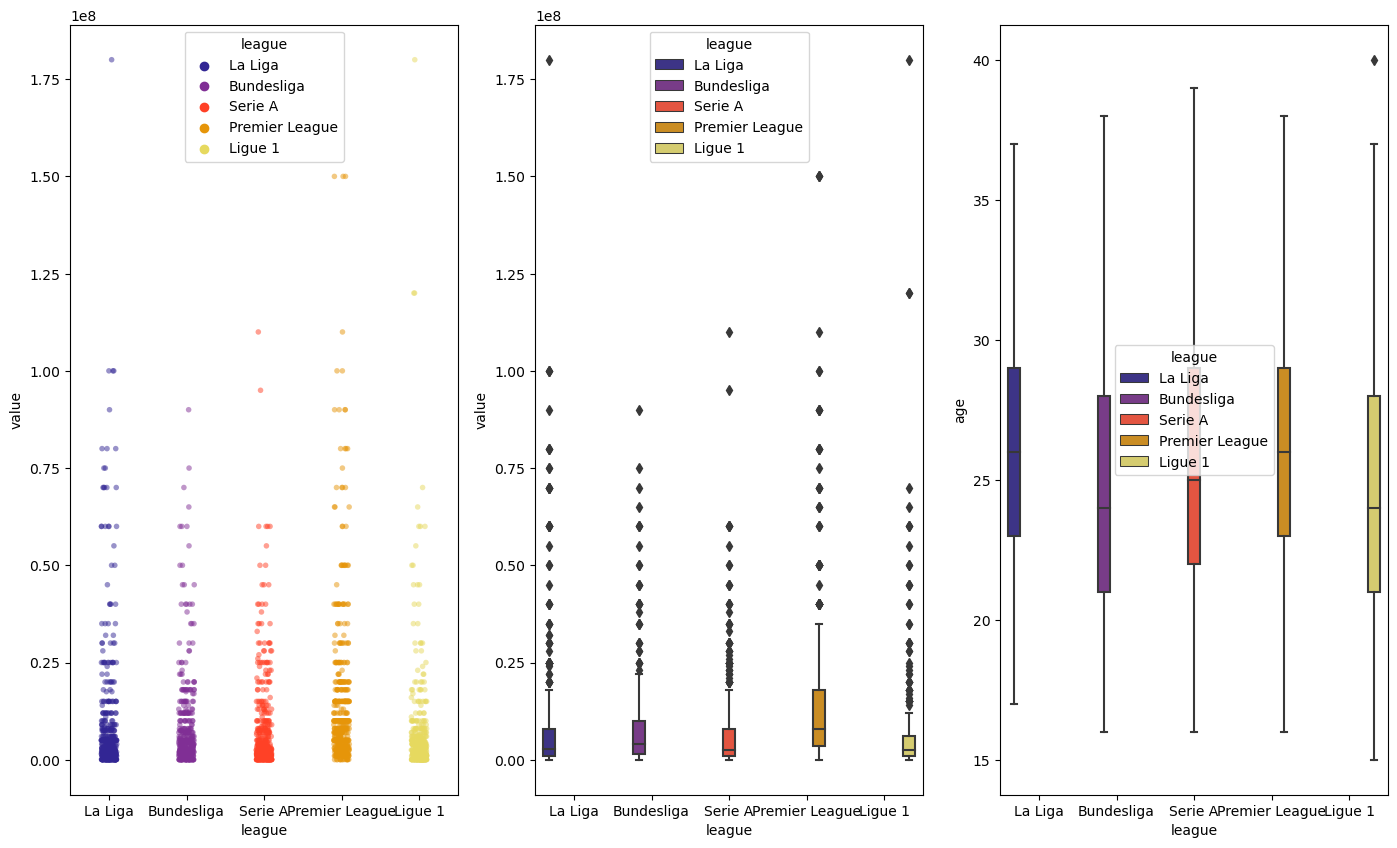

In [802]:
# Creating scatter and box subplot of value vs league

fig3, ax = plt.subplots(1,3, sharex=True, figsize=(17,10))

g = sns.stripplot(data=clean_data_df, x='league', y='value', palette='CMRmap',size=4, alpha=0.5,ax=ax[0],hue='league')

g = sns.boxplot(data=clean_data_df, x='league', y='value', palette='CMRmap',ax=ax[1],hue='league')
g = sns.boxplot(data=clean_data_df, x='league', y='age', palette='CMRmap',ax=ax[2],hue='league')



In [803]:
# Calculating number of players per league
player_by_league = clean_data_df.groupby(['league']).count()['player']
player_by_league = player_by_league.sort_values(ascending=False)
player_by_league_df = pd.DataFrame(player_by_league)
player_by_league_df

,player
league,
La Liga,478
Premier League,476
Serie A,471
Ligue 1,431
Bundesliga,375


In [804]:
#Pie chart to show the distribution of players per league
player_df = pd.DataFrame({'league': ['La Liga', 'Premier League', 'Serie A', 'Ligue 1', 'Bundesliga'],
                         'player': [478, 476, 471, 431, 375]})
player_df.iplot(kind='pie', labels='league', values='player', title='Percentage of Players by league',dimensions=(500,500))


### (Analysis note: Bundesliga has a less number of players since it has 18 clubs vs other leagues has 20 teams)

In [805]:
# Calculate the number of right/left foot players
foot_type = clean_data_df.groupby(['foot']).count()['player']
foot_type_df = pd.DataFrame(foot_type)
foot_type_df = foot_type_df.sort_values(by= ['foot'],ascending=False)
foot_type_df


,player
foot,
right,1600
left,566
both,60


In [806]:
# Create bar chart to illustrate by foot preferences
fig2 = px.bar(foot_type_df, title='Foot Type',width=600,height=500)
fig2

In [807]:
# Determine which position plays the most minutes
position_minutes = clean_data_df.groupby(["position"])["minutes"].sum()
position_minutes = position_minutes.sort_values(ascending=False)
position_minutes_df = pd.DataFrame(position_minutes) 
position_minutes_df[:10]

,minutes
position,
DF,984331
MF,591090
FW,326750
"FW,MF",322182
"MF,FW",301127
GK,265953
"DF,MF",162296
"MF,DF",63246
"DF,FW",18118


In [808]:
# Plot bar chart which position plays the most minutes
fig22 = px.bar(position_minutes_df[:10],width=600,height=400)
fig22


In [809]:
#Print plot to Html,pdf or powerpoint
pio.write_html(fig22, file='bar_chart2.html')

In [810]:
# Determine which league has the highest value of players
league_value = clean_data_df.groupby(["league"])["value"].sum()
league_value = league_value.sort_values(ascending=False)
league_value_df = pd.DataFrame(league_value)
league_value_df

,value
league,
Premier League,7251405000
La Liga,4443875000
Serie A,3489490000
Bundesliga,3254652500
Ligue 1,2975815000


In [811]:
# Bar chart to show the value of each league
px.bar(league_value_df,width=600,height=500)

In [812]:
# Determine which age has the highest value
age_value = clean_data.groupby(["age"])["value"].sum()
age_value=age_value.sort_values(ascending=False)
age_value_df = pd.DataFrame(age_value)

age_value_df

,value
age,
26,2497790000
25,2435640000
23,2254495000
24,2227905000
28,1739285000
21,1555360000
22,1521615000
27,1429055000
30,1335930000


In [813]:
# Create scatter plot to show the value of players by age
px.scatter(age_value_df, width=700, height=500,trendline='ols',title='Average Value per Age')

In [814]:
#Scatter plot of age vs value
px.scatter(clean_data_df,x="age", y="value",trendline='ols',width=600, height=400,hover_data=['player'],title='Value vs Age')

In [815]:
# Perform the T-Test on the Player value & goals
value = clean_data_df['value']
age = clean_data_df['age']

t, p = ttest_ind(value, age)

print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  27.163519717041616
p-value:  1.6947658895243164e-150


In [816]:
# Determine which position has the most red cards

red_cards = clean_data_df.groupby(['position'])['cards_red'].sum().reset_index()
yellow_cards = clean_data_df.groupby(['position'])['cards_yellow'].sum().reset_index()
card_stats_df = pd.merge(red_cards,yellow_cards,on='position')
card_stats_df







,position,cards_red,cards_yellow
0,DF,154,2126
1,"DF,FW",0,23
2,"DF,MF",22,321
3,FW,28,579
4,"FW,DF",0,16
5,"FW,MF",35,535
6,GK,10,131
7,"GK,MF",1,0
8,MF,118,1562
9,"MF,DF",7,153


In [817]:
# Determine the average player age
average_age = soccer_data['age'].mean()
average_age

25.416666666666668

In [818]:
# How does the league in which the player plays affect their value, goals scored, and minutes played?

In [819]:
# Run correlation between value of player and points per game
value_pts_g_correlation = soccer_data['value'].corr(soccer_data['Pts/G'])
value_pts_g_correlation

0.4901480622994063

In [820]:
#check the correlation between columns
corr = clean_data.corr(numeric_only=True)
corr

,Unnamed: 0,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
Unnamed: 0,1.000000,-0.049495,0.044678,0.008410,-0.002229,-0.004783,-0.006584,-0.007414,0.010261,-0.002630,...,0.055714,0.048299,0.050309,0.063703,-0.050093,0.063453,0.063329,0.064806,0.003679,0.021759
age,-0.049495,1.000000,-0.994156,-0.083536,0.043079,0.148406,0.178549,0.173845,0.031443,0.005836,...,-0.021040,-0.007071,-0.018282,-0.046584,-0.009191,-0.024090,-0.023207,-0.034054,-0.014722,0.031771
birth_year,0.044678,-0.994156,1.000000,0.084073,-0.043886,-0.150598,-0.182003,-0.177471,-0.031661,-0.007271,...,0.022794,0.008552,0.019236,0.048093,0.007515,0.025830,0.024898,0.033872,0.015598,-0.030237
value,0.008410,-0.083536,0.084073,1.000000,-0.044127,0.330408,0.337175,0.336775,0.559716,0.528016,...,0.507714,0.490348,0.490062,0.486751,-0.392544,0.489598,0.489553,0.459898,0.175415,0.114718
height,-0.002229,0.043079,-0.043886,-0.044127,1.000000,-0.010773,0.053961,0.060047,-0.082202,-0.217431,...,-0.004255,-0.022699,-0.013838,-0.007013,-0.025333,0.008084,0.008296,-0.001241,0.009515,0.015896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xGDiff,0.063453,-0.024090,0.025830,0.489598,0.008084,0.075117,0.060673,0.062745,0.194959,0.240806,...,0.930590,0.892924,0.901777,0.928784,-0.884194,1.000000,0.999301,0.676344,0.178207,0.039678
xGDiff/90,0.063329,-0.023207,0.024898,0.489553,0.008296,0.075071,0.060622,0.062678,0.195210,0.241809,...,0.929627,0.892027,0.902342,0.929221,-0.882201,0.999301,1.000000,0.678231,0.176076,0.039204
CL,0.064806,-0.034054,0.033872,0.459898,-0.001241,0.030844,0.022193,0.022648,0.149921,0.185333,...,0.747822,0.729308,0.744903,0.666494,-0.550030,0.676344,0.678231,1.000000,0.201041,0.044762
WinCL,0.003679,-0.014722,0.015598,0.175415,0.009515,0.017387,0.014292,0.014723,0.067265,0.067259,...,0.167284,0.130895,0.125067,0.262461,-0.035770,0.178207,0.176076,0.201041,1.000000,0.222652


<AxesSubplot: >

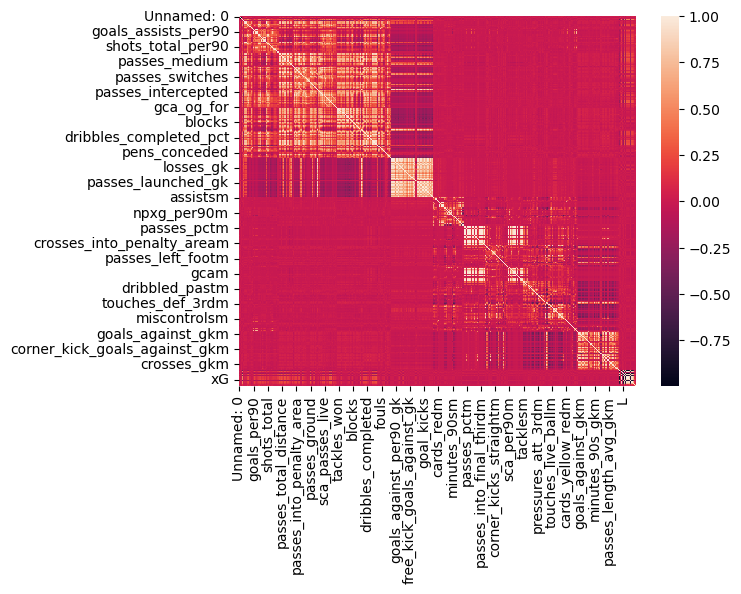

In [821]:
sns.heatmap(corr)

In [822]:
## plot a scatter plot between two columns (need to add linear regression)
px.scatter(clean_data_df,x='value', y='goals',trendline='ols',width=600,height=500,title='Player value vs Goals')


In [836]:
# Perform the T-Test on the Player value & goals
value = clean_data_df['value']
goals = clean_data_df['goals']

t, p = ttest_ind(value, goals)

print("t-statistic: ", t)
print("p-value: ", p)


t-statistic:  27.163586450073577
p-value:  1.6921283697150687e-150


In [838]:
## plot a scatter plot between two columns (need to add linear regression)
px.scatter(clean_data_df,x='age', y='goals',trendline='ols',width=600,height=500,title='Age vs Goals')

In [837]:
# Perform the T-Test on the Age  & goals
age = clean_data_df['age']
goals = clean_data_df['goals']

t, p = ttest_ind(age, goals)

print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  197.72396036367533
p-value:  0.0


In [824]:
# How does the number of tackles and tackles won relate to the player's position?
grouped = clean_data_df.groupby('position')['tackles', 'tackles_won'].mean()
grouped = grouped.sort_values(by=['tackles','tackles_won'],ascending=False)
grouped[:10]

C:\Users\agorbulin\AppData\Local\Temp\ipykernel_30524\4167302216.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,tackles,tackles_won
position,,
MF,32.608696,21.919908
"DF,MF",30.376068,17.923077
"MF,DF",29.446809,18.680851
DF,29.249211,17.184543
"MF,FW",19.349593,12.703252
"DF,FW",18.476190,10.190476
"FW,MF",14.375439,9.319298
"FW,DF",10.800000,6.600000
FW,9.705426,6.410853


In [825]:
# Calculate the average number of tackles and tackles won per position
grouped['tackles_won_per_tackle%'] = grouped['tackles_won'] / grouped['tackles'] *100
grouped_df = pd.DataFrame(grouped)
grouped_df

,tackles,tackles_won,tackles_won_per_tackle%
position,,,
MF,32.608696,21.919908,67.221053
"DF,MF",30.376068,17.923077,59.003939
"MF,DF",29.446809,18.680851,63.439306
DF,29.249211,17.184543,58.752157
"MF,FW",19.349593,12.703252,65.651261
"DF,FW",18.476190,10.190476,55.154639
"FW,MF",14.375439,9.319298,64.827923
"FW,DF",10.800000,6.600000,61.111111
FW,9.705426,6.410853,66.054313


In [826]:
# Create a line chart to display the relationship between tackles & tackles won + success percentage
fig = px.line(grouped_df[:10],width=700,height=500)
fig.update_layout(xaxis_title='position', yaxis_title='Tackles')

fig

In [827]:
# The most valuable squad?
value_per_squad = clean_data_df.groupby(['squad']).sum()['value']
value_per_squad = value_per_squad.sort_values(ascending=False)
value_per_squad[:10]

C:\Users\agorbulin\AppData\Local\Temp\ipykernel_30524\2285151990.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



squad
Barcelona          984500000
Manchester City    945000000
Paris S-G          886500000
Liverpool          810500000
Real Madrid        807530000
Manchester Utd     780000000
Chelsea            776000000
Bayern Munich      753680000
Tottenham          733500000
Arsenal            655000000
Name: value, dtype: int64

In [828]:
px.bar(value_per_squad[:10],width=600,height=500)

In [829]:
# What is the correlation between xG and actual goals scored for the players in the squad?
correlation = soccer_data['xG'].corr(soccer_data['Pts/G'])
correlation

0.8487666286266665

In [830]:
goals_per_90_by_position = [clean_data_df.loc[clean_data_df['position'] == pos, 'goals_per90'] for pos in clean_data_df['position'].unique()]
position_labels = clean_data_df['position'].unique()
table = pd.DataFrame({'Position': position_labels, 'Goals per 90 minutes': goals_per_90_by_position})
table

,Position,Goals per 90 minutes
0,"FW,MF",0 0.09 9 0.00 19 0.18 29 ...
1,DF,1 0.00 2 0.00 3 0.04 10 ...
2,MF,4 0.11 8 0.00 12 0.25 23 ...
3,"MF,FW",5 0.27 15 0.00 16 0.00 26 ...
4,FW,6 0.22 7 0.37 17 0.41 39 ...
5,GK,13 0.0 18 0.0 25 0.0 35 0....
6,"MF,DF",14 0.11 37 0.00 75 0.00 91 ...
7,"DF,MF",20 0.00 24 0.23 73 0.06 82 ...
8,"DF,FW",50 0.00 131 0.00 185 0.00 211 ...
9,"FW,DF",246 0.00 302 0.06 314 0.00 616 ...


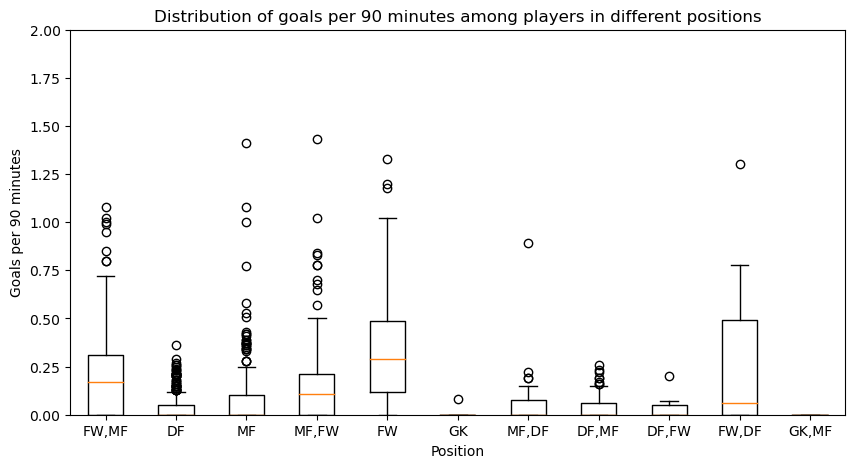

In [831]:
# What is the distribution of goals per 90 minutes among players in different positions?

plt.figure(figsize=(10, 5))
plt.boxplot([clean_data_df.loc[clean_data_df['position'] == pos, 'goals_per90'] for pos in clean_data_df['position'].unique()], labels=clean_data_df['position'].unique())
plt.xlabel('Position')
plt.ylabel('Goals per 90 minutes')
plt.ylim(0,2)
plt.title('Distribution of goals per 90 minutes among players in different positions')
plt.show()

## Requirements
Completed Analysis Uploaded to GitHub (20 points)

Final data analysis contains ample and complete information in README file (10 points)

Final repository is acceptable for professional quality presentation (10 points)

Visualizations (20 points)

6–8 visualizations of data (at least two per question) (10 points)

Clear and accurate labeling of images (5 points)

Visualizations supported with ample and precise explanation (5 points)

Analysis and Conclusion (20 points)

Write-up summarizes major findings and implications at a professional level (5 points)

Each question in the project proposal is answered with precise descriptions and findings (5 points)

Findings are strongly supported with numbers and visualizations (5 points)

Each question response is supported with a well-discerned statistical analysis from lessons (e.g., aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis) (5 points)

Group Presentation (20 points)

All group members spoke during the presentation (5 points)

Group was well prepared (5 points)

Presentation is relevant to material (5 points)

Presentation maintains audience interest (5 points)

Slide Deck (20 points)

Slides are visually clean and professional (5 points)

Slides are relevant to material (5 points)

Slides effectively demonstrate the project (5 points)

Slides are clear and maintain audience interest (5 points)